# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [ ]:
# First Activation Map
V[0,0,0] = np.sum(X[:,:3,:3] * W0) + b0
V[0,0,1] = np.sum(X[:,:3,2:5] * W0) + b0
V[0,0,2] = np.sum(X[:,:3,4:] * W0) + b0
V[0,1,0] = np.sum(X[:,2:5,:3] * W0) + b0
V[0,1,1] = np.sum(X[:,2:5,2:5] * W0) + b0
V[0,1,2] = np.sum(X[:,2:5,4:] * W0) + b0 
V[0,2,0] = np.sum(X[:,4:,:3] * W0) + b0
V[0,2,1] = np.sum(X[:,4:,2:5] * W0) + b0
V[0,2,2] = np.sum(X[:,4:,4:] * W0) + b0

# Second Activation Map
V[1,0,0] = np.sum(X[:,:3,:3] * W1) + b1
V[1,0,1] = np.sum(X[:,:3,2:5] * W1) + b1
V[1,0,2] = np.sum(X[:,:3,4:] * W1) + b1
V[1,1,0] = np.sum(X[:,2:5,:3] * W1) + b1
V[1,1,1] = np.sum(X[:,2:5,2:5] * W1) + b1
V[1,1,2] = np.sum(X[:,2:5,4:] * W1) + b1
V[1,2,0] = np.sum(X[:,4:,:3] * W1) + b1
V[1,2,1] = np.sum(X[:,4:,2:5] * W1) + b1
V[1,2,2] = np.sum(X[:,4:,4:] * W1) + b1
V

In [221]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [222]:
import numpy as np

In [223]:
X = np.array([[[0,0,0,0,0,0,0],[0,1,2,2,2,0,0],[0,2,1,1,0,0,0],[0,2,0,1,0,2,0],[0,1,2,2,1,1,0],[0,0,0,0,1,2,0],[0,0,0,0,0,0,0]],
              [[0,0,0,0,0,0,0],[0,1,2,2,1,1,0],[0,1,0,0,2,1,0],[0,2,0,2,1,0,0],[0,1,0,1,0,0,0],[0,2,2,1,0,1,0],[0,0,0,0,0,0,0]],
              [[0,0,0,0,0,0,0],[0,2,2,1,2,2,0],[0,2,1,2,0,2,0],[0,2,2,0,2,2,0],[0,1,2,2,2,1,0],[0,2,1,1,0,2,0],[0,0,0,0,0,0,0]]])

W0 = np.array([[[0,-1,-1],[-1,0,-1],[-1,1,0]],[[-1,1,1],[1,0,1],[-1,1,1]],[[0,1,-1],[0,1,1],[-1,1,1]]])
W1 = np.array([[[1,1,0],[1,-1,-1],[1,-1,1]],[[-1,0,0],[-1,-1,-1],[0,1,-1]],[[0,-1,1],[0,0,1],[0,1,0]]])

b0 = 1
b1 = 0

V = np.zeros((2,3,3))

In [417]:
W0[0].shape

(3, 3)

In [418]:
'''Extracting submatrices from a matrix'''
def submatrix(matrix, stride, weight_size):
    row_length, column_length = weight_size
    matrix_list = []   
    endpoint_row = 0
    for row_counter in range(0,matrix.shape[0],stride): 
        if row_counter+row_length <= matrix.shape[0]:
            for column_counter in range(0,matrix.shape[1], stride):
                if column_counter+column_length <= matrix.shape[1]:
                    matrix_list.append(matrix[row_counter:row_counter+row_length,column_counter:column_counter+column_length])
    return matrix_list
submatrix(X[0],2,W0[0].shape)

[array([[0, 0, 0],
        [0, 1, 2],
        [0, 2, 1]]), array([[0, 0, 0],
        [2, 2, 2],
        [1, 1, 0]]), array([[0, 0, 0],
        [2, 0, 0],
        [0, 0, 0]]), array([[0, 2, 1],
        [0, 2, 0],
        [0, 1, 2]]), array([[1, 1, 0],
        [0, 1, 0],
        [2, 2, 1]]), array([[0, 0, 0],
        [0, 2, 0],
        [1, 1, 0]]), array([[0, 1, 2],
        [0, 0, 0],
        [0, 0, 0]]), array([[2, 2, 1],
        [0, 0, 1],
        [0, 0, 0]]), array([[1, 1, 0],
        [1, 2, 0],
        [0, 0, 0]])]

In [414]:
'''getting convolutional matrix'''
def convolved_matrix(weights, sub_matrix):
    product_matrices = sub_matrix * weights
    convolved_list = []
    temps = []
    for count in range(len(product_matrices)):
        temp = (product_matrices)[count].sum()
        temps.append(temp)
        
    convolved_list.append(temps)
    output_matrix_size = int(np.sqrt(len(convolved_list[0])))
    
    return np.array(convolved_list).reshape(output_matrix_size,output_matrix_size)


In [419]:
output_1 = [convolved_matrix(W0[0], submatrix(X[0], 2, W0[0].shape))+
            convolved_matrix(W0[1], submatrix(X[1], 2, W0[1].shape))+
            convolved_matrix(W0[2], submatrix(X[2], 2, W0[2].shape))+b0]
output_1

[array([[11,  6,  3],
        [ 9, 10,  4],
        [ 3,  1,  2]])]

In [363]:
output_2 = [convolved_matrix(W1[0], submatrix(X[0], 2, W1[0]))+
            convolved_matrix(W1[1], submatrix(X[1], 2, W1[1]))+
            convolved_matrix(W1[2], submatrix(X[2], 2, W1[2]))+b1]
output_2

[array([[-2, -5,  3],
        [ 2,  2, -6],
        [-1,  0, -1]])]

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [ ]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [395]:
output_1

[array([[11,  6,  3],
        [ 9, 10,  4],
        [ 3,  1,  2]])]

In [433]:
def max_pool(matrix, filter_size, stride):
    filter_rows, filter_cols = filter_size
    max_pool_list = []
    sub_matrices = submatrix(matrix,stride,filter_size)
    for length in range(len(sub_matrices)):
        max_pool_list.append(np.max(sub_matrices[length]))
    return np.array(max_pool_list).reshape((int(np.sqrt(len(max_pool_list))),int(np.sqrt(len(max_pool_list)))))
    
max_pool(output_1[0], (2,2), 1)

array([[11, 10],
       [10, 10]])

In [408]:
output_1[0]

array([[11,  6,  3],
       [ 9, 10,  4],
       [ 3,  1,  2]])

### Question 2

In [ ]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [435]:
def average_pool(matrix, filter_size, stride):
    filter_rows, filter_cols = filter_size
    average_pool_list = []
    sub_matrices = submatrix(matrix,stride,filter_size)
    for length in range(len(sub_matrices)):
        average_pool_list.append(np.mean(sub_matrices[length]))
    return np.array(average_pool_list).reshape((int(np.sqrt(len(average_pool_list))),int(np.sqrt(len(average_pool_list)))))
    
average_pool(output_1[0], (2,2), 1)

array([[ 9.  ,  5.75],
       [ 5.75,  4.25]])

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [7]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

### Display the image

In [8]:
image = cv2.imread('beer.png') # Please load different Images to explore 

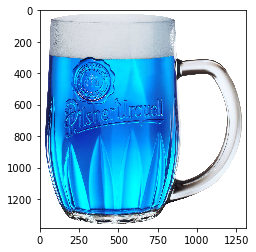

In [9]:
plt.imshow(image)

In [10]:
# what does the image look like?
image.shape

(1384, 1310, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - 3 colour channel

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [11]:
model = Sequential()
model.add(Convolution2D(3,    # number of filters____________
                        (3,    # _____x______ dimension of kernel 
                        3),    # ________y___ dimension of kernel
                        input_shape=image.shape))

In [13]:
image_batch = np.expand_dims(image,axis=0)
image_batch.shape

(1, 1384, 1310, 3)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - first value of the size treated as the number of data points

In [14]:
image_batch.shape

(1, 1384, 1310, 3)

In [15]:
conv_image = model.predict(image_batch)

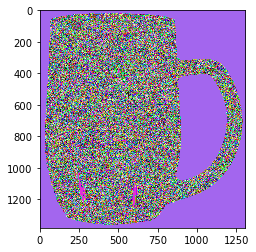

In [16]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [17]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(1382, 1308, 3)


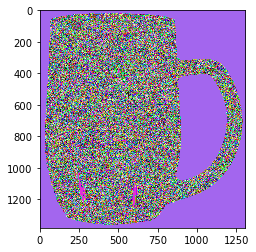

In [18]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

In [19]:
reshaped_image=image.reshape(image.shape[2], image.shape[0], image.shape[1])
reshaped_image.shape

(3, 1384, 1310)

In [20]:
convolved_img = get_convolved_array(reshaped_image, filter_list, bias_list, 1)

NameError: name 'get_convolved_array' is not defined

In [21]:
convolved_image = convolved_img.reshape(convolved_img.shape[1], convolved_img.shape[2], convolved_img.shape[0])

NameError: name 'convolved_img' is not defined

In [ ]:
convolved_image.shape

In [ ]:
plt.imshow(convolved_image[:, :, 0])

## 10x10 Kernel Convimage

(1375, 1301, 3)


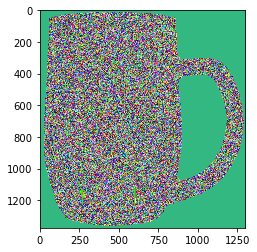

In [22]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - image with 10 * 10 kernel skips many features

### Question 2

### What is the reason behing this difference ?

Answer - much information is lost by choosing such high kernel size

# Play around with code below, to enhance your understading

## Another image Vis 

In [23]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [24]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(1382, 1308, 1)
(1382, 1308)


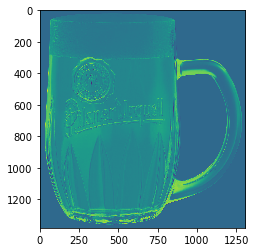

In [25]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

(1370, 1296, 1)
(1370, 1296)


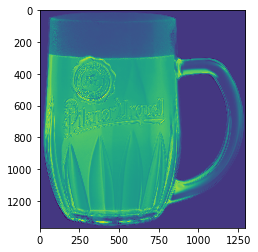

In [26]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [27]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(1382, 1308, 1)
(1382, 1308)


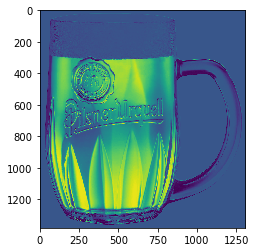

In [28]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(276, 261, 3)


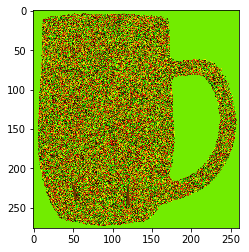

In [29]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)